<a href="https://colab.research.google.com/github/Disha6/Titanic-survival/blob/master/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC PASSENGER SURVIVAL - MACHINE LEARNING

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from collections import Counter
from statistics import mode
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# Storing Passenger Id for submission
Id = test.PassengerId


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data Visualisation

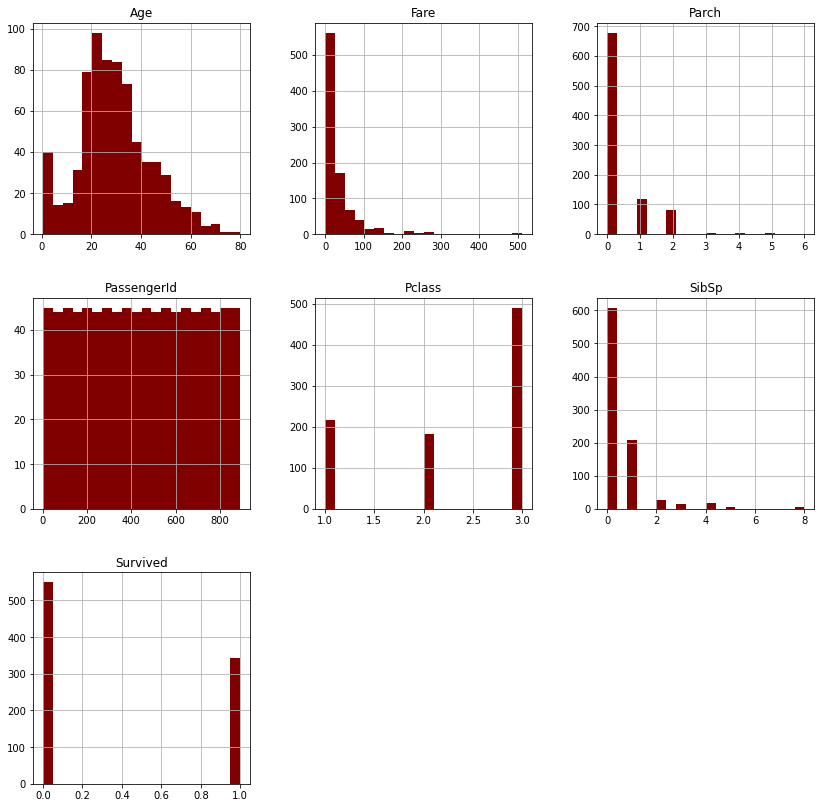

In [7]:
train.hist(figsize=(14,14), color='maroon', bins=20)
plt.show()

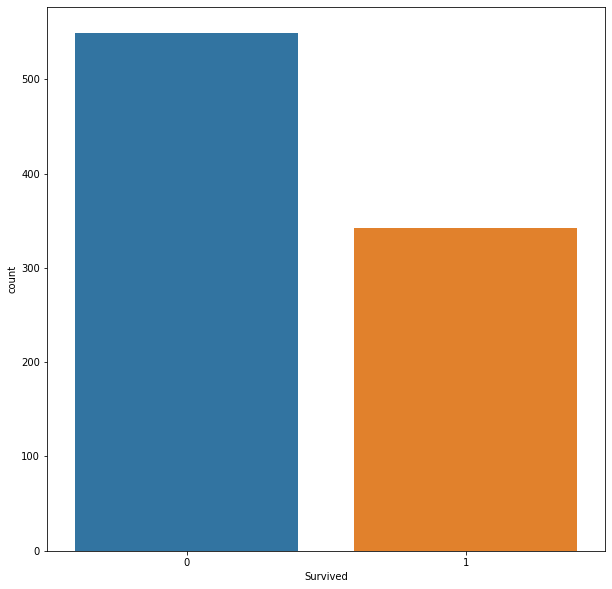

In [8]:
fig = plt.figure(figsize=(10,10))
sns.countplot(train['Survived'], data=train)

# Sex Visualisation

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


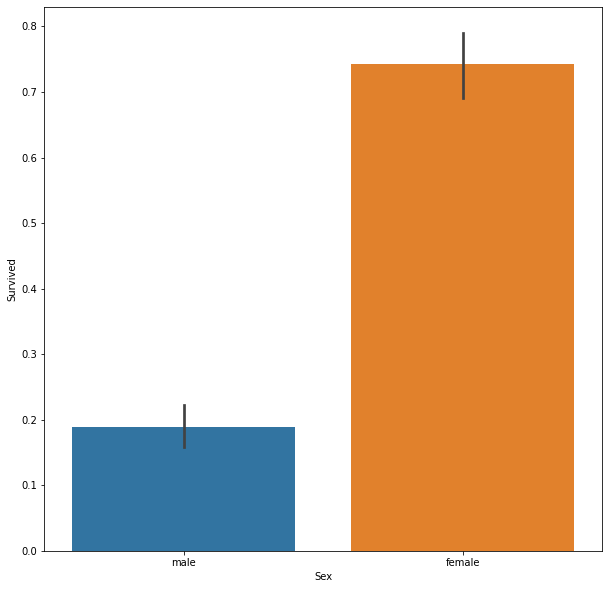

In [9]:
fig = plt.figure(figsize=(10,10))

sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

# Pclass Visualisation

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


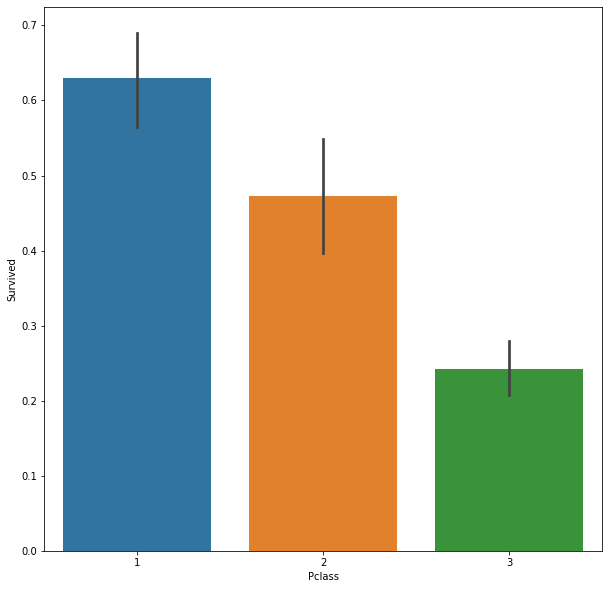

In [10]:
fig = plt.figure(figsize=(10,10))


#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

# SibSp Visualisation

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


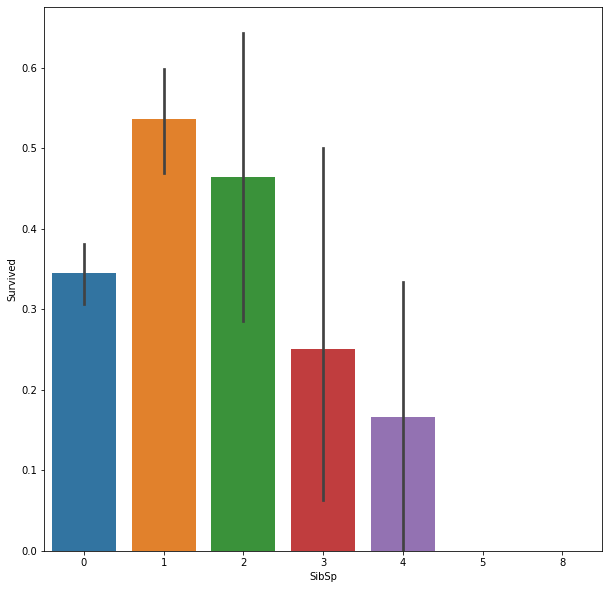

In [11]:
fig = plt.figure(figsize=(10,10))


#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

# Parch Visulaisation

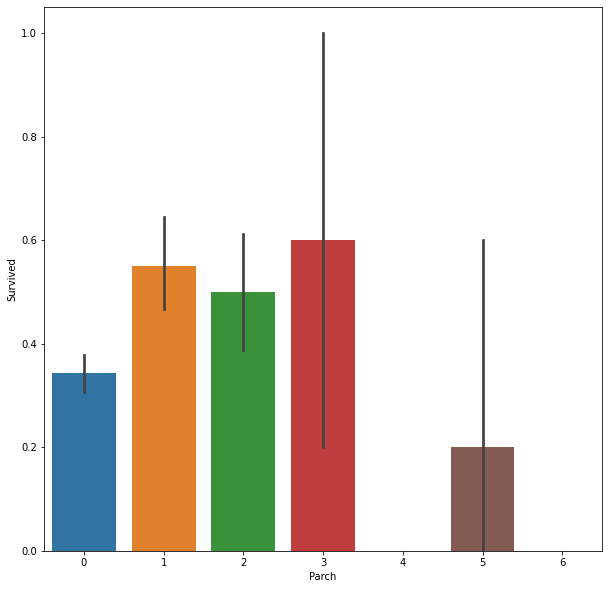

In [12]:
fig = plt.figure(figsize=(10,10))


sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

# Data Preparation

In [13]:
dataset = pd.concat([train, test], sort=False, ignore_index=True)

In [14]:
dataset.isnull().mean().sort_values(ascending=False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

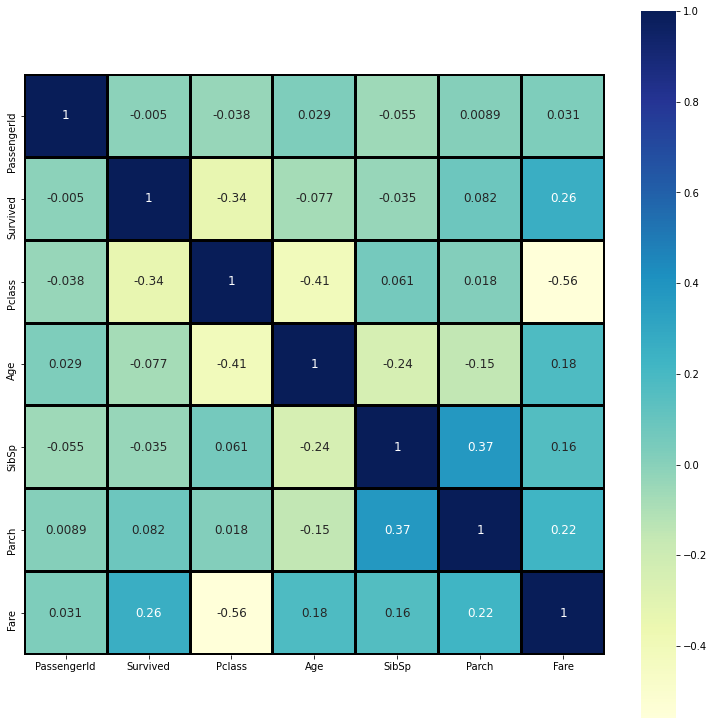

In [15]:
# Checking correlations with Heatmap

fig, axs = plt.subplots(nrows=1, figsize=(13, 13))
sns.heatmap(dataset.corr(), annot=True, square=True, cmap='YlGnBu', linewidths=2, linecolor='black', annot_kws={'size':12})

# Fare Feature

In [16]:
dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)

# Embarked Feature

In [17]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

# Title Feature

In [18]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
dataset['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

In [20]:
# This shows the percentage of occurrences for each title. 'Mr' occurs the most often.

dataset['Title'].value_counts(normalize=True)*100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Dr           0.611154
Rev          0.611154
Col          0.305577
Ms           0.152788
Major        0.152788
Mlle         0.152788
Don          0.076394
Sir          0.076394
Capt         0.076394
Lady         0.076394
Jonkheer     0.076394
Dona         0.076394
Countess     0.076394
Mme          0.076394
Name: Title, dtype: float64

In [21]:
dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

dataset['Title'] = dataset['Title'].map(title_mapping)

# Imputing missing values with 0
dataset['Title'] = dataset['Title'].fillna(0)

In [22]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# Age Feature

In [23]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

# Ticket Feature

In [24]:
dataset.drop(['Ticket'], axis=1, inplace=True)

# Name Feature

In [25]:
dataset.drop(['Name'], axis=1, inplace=True)

# Cabin Feature

In [26]:
dataset.drop(['Cabin'], axis=1, inplace=True)

# Family Size Feature(Created)

In [27]:
dataset['SibSp'].corr(dataset['Parch'])

0.3735871906264925

In [28]:
dataset['Parch'].corr(dataset['SibSp'])

0.3735871906264925

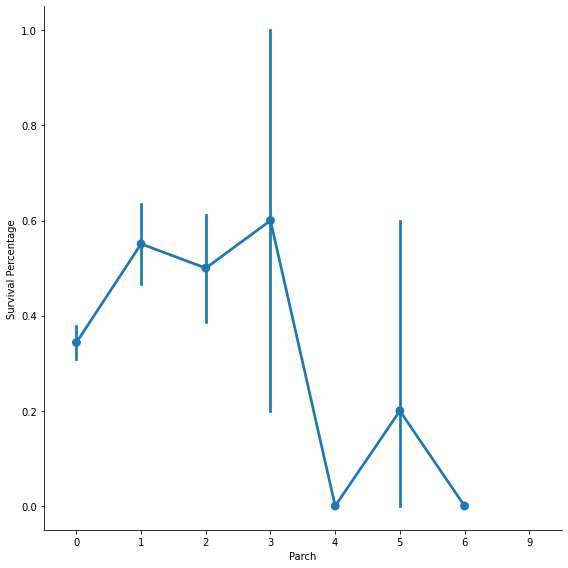

In [29]:
g  = sns.factorplot(x="Parch",y="Survived",data=dataset, size = 8)
g = g.set_ylabels("Survival Percentage")

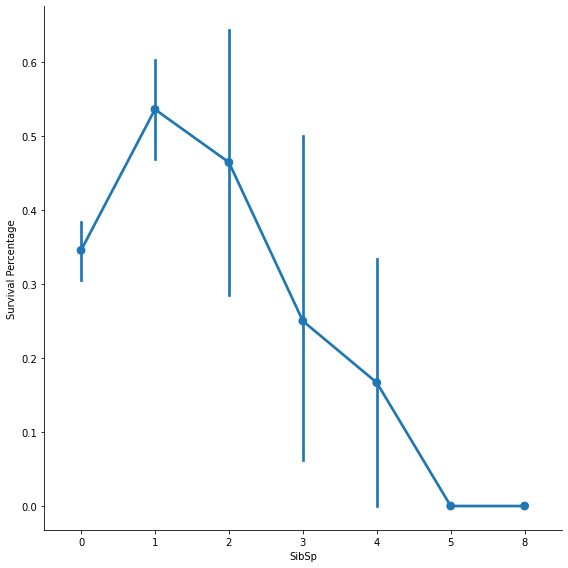

In [30]:
g  = sns.factorplot(x="SibSp",y="Survived",data=dataset, size = 8)
g = g.set_ylabels("Survival Percentage")

In [31]:
# Family Size = # of Siblings + # of Parents + You
dataset['FamSize'] = dataset['SibSp'] + dataset['Parch'] + 1

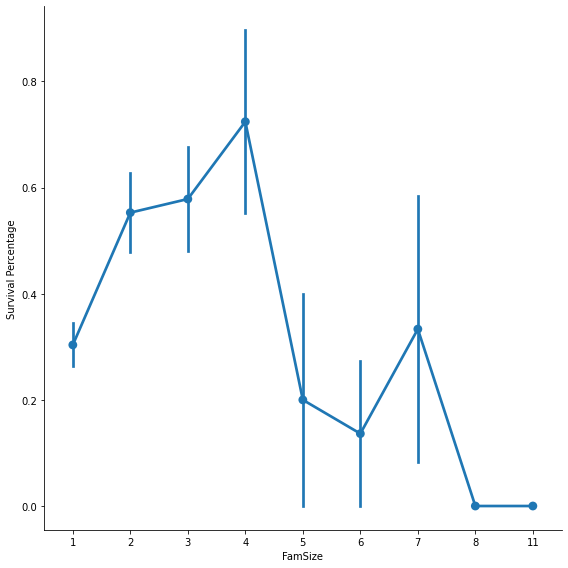

In [32]:
g  = sns.factorplot(x="FamSize",y="Survived",data=dataset, size = 8)
g = g.set_ylabels("Survival Percentage")

# Modeling

In [33]:
dataset.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
FamSize          0
dtype: int64

In [34]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
0,1,0.0,3,male,22.0,1,0,7.2500,S,1,2
1,2,1.0,1,female,38.0,1,0,71.2833,C,3,2
2,3,1.0,3,female,26.0,0,0,7.9250,S,2,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,3,2
4,5,0.0,3,male,35.0,0,0,8.0500,S,1,1


In [35]:
label = LabelEncoder()

In [36]:
for col in ['Sex', 'Embarked']:
    dataset[col] = label.fit_transform(dataset[col])

In [37]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
0,1,0.0,3,1,22.0,1,0,7.2500,2,1,2
1,2,1.0,1,0,38.0,1,0,71.2833,0,3,2
2,3,1.0,3,0,26.0,0,0,7.9250,2,2,1
3,4,1.0,1,0,35.0,1,0,53.1000,2,3,2
4,5,0.0,3,1,35.0,0,0,8.0500,2,1,1


In [38]:
# Splitting dataset into train
train = dataset[:len(train)]

# Splitting dataset into test
test = dataset[len(train):]

# Drop labels 'Survived' because there shouldn't be a Survived column in the test data
test.drop(labels=['Survived'], axis=1, inplace=True)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
0,1,0.0,3,1,22.0,1,0,7.2500,2,1,2
1,2,1.0,1,0,38.0,1,0,71.2833,0,3,2
2,3,1.0,3,0,26.0,0,0,7.9250,2,2,1
3,4,1.0,1,0,35.0,1,0,53.1000,2,3,2
4,5,0.0,3,1,35.0,0,0,8.0500,2,1,1


In [40]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
891,892,3,1,34.5,0,0,7.8292,1,1,1
892,893,3,0,47.0,1,0,7.0000,2,3,2
893,894,2,1,62.0,0,0,9.6875,1,1,1
894,895,3,1,27.0,0,0,8.6625,2,1,1
895,896,3,0,22.0,1,1,12.2875,2,3,3


In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
0,1,0.0,3,1,22.0,1,0,7.2500,2,1,2
1,2,1.0,1,0,38.0,1,0,71.2833,0,3,2
2,3,1.0,3,0,26.0,0,0,7.9250,2,2,1
3,4,1.0,1,0,35.0,1,0,53.1000,2,3,2
4,5,0.0,3,1,35.0,0,0,8.0500,2,1,1


In [42]:
train['Survived'] = train['Survived'].astype(int)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

y=train.Survived
X=train.drop('Survived', axis=1)

In [44]:
cross_val_score(LogisticRegression(), X, y).mean()

0.8024668884564686

In [45]:
cross_val_score(SVC(), X, y).mean()

0.6397589605172306

In [46]:
cross_val_score(RandomForestClassifier(), X, y).mean()

0.8014625572782623

In [47]:
cross_val_score(GaussianNB(), X, y).mean()

0.7991212102190698

In [48]:
cross_val_score(DecisionTreeClassifier(), X, y).mean()

0.7432239030820413

In [49]:
cross_val_score(GradientBoostingClassifier(), X, y).mean()

0.7835791852363319

In [50]:
# Using train_test_split we split the data into train and validation data for testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [51]:
# Our final model
final_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)



# Train final_model with train data
final_model.fit(X_train, y_train)

# Predict final_model
predictions = final_model.predict(X_val)

# Print out score
print('Accuracy: ', accuracy_score(predictions, y_val))

Accuracy:  0.7988826815642458


# Submission

In [52]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
891,892,3,1,34.5,0,0,7.8292,1,1,1
892,893,3,0,47.0,1,0,7.0000,2,3,2
893,894,2,1,62.0,0,0,9.6875,1,1,1
894,895,3,1,27.0,0,0,8.6625,2,1,1
895,896,3,0,22.0,1,1,12.2875,2,3,3


In [53]:
final_predictions = final_model.predict(test)

output = pd.DataFrame({'PassengerId': Id, 'Survived':final_predictions})
output.to_csv('submission.csv', index=False)

In [54]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
